In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as sk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import math

In [2]:
prodata = pd.read_csv("Carseats.csv")

In [3]:
prodata.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
prodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


* From The above structure we can say that Carseats dataset contains 400 observations on eight numeric and three object variables.

In [5]:
prodata.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


As seen above, the mean and median values for all the variables
are almost equivalent, indicating that their distributions are somewhat
symmetric

In [6]:
prodata.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


* To view a summary of the character variables,we can use the above command.
* the variable ShelveLoc has 3 levels. On the other hand, US and Urban have 2 levels each

In [7]:
prodata['ShelveLoc'].unique()


array(['Bad', 'Good', 'Medium'], dtype=object)

From above we can see that ShelveLoc has 3 category:-‘Bad’, ‘Good’, and
‘Medium’

# stem-and-leaf plot 

In [8]:
!pip install stemgraphic

In [9]:
import stemgraphic

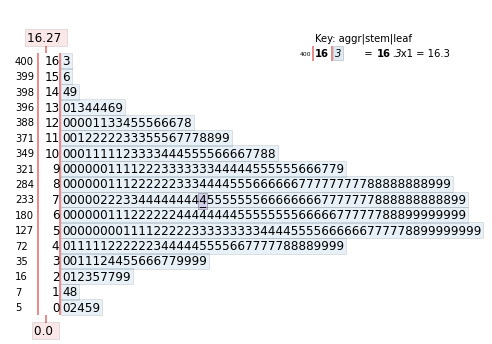

In [10]:
stemgraphic.stem_graphic(prodata['Sales'],
scale=1);


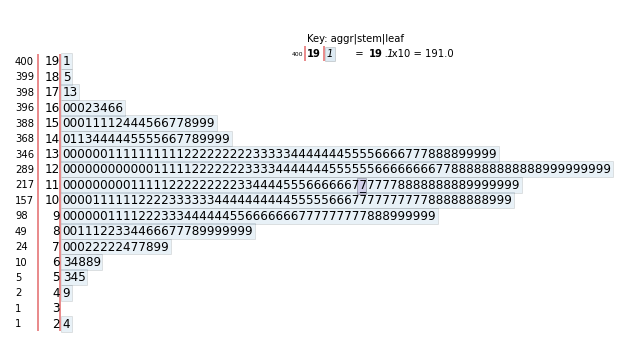

In [11]:
stemgraphic.stem_graphic(prodata['Price'],
scale=10);

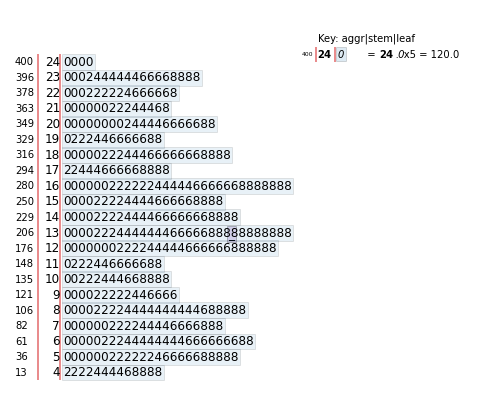

In [12]:
stemgraphic.stem_graphic(prodata['Income'],
scale=5);

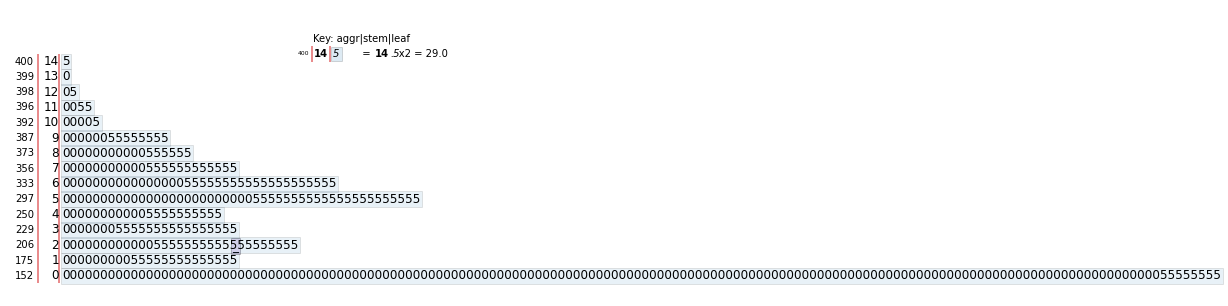

In [13]:
stemgraphic.stem_graphic(prodata['Advertising'],
scale=2);


we can observe that for Advertising, the results do not look neat. Thus,
histograms provide an edge over stem-and-leaf plots as they are more
interpretable.


# Histograms

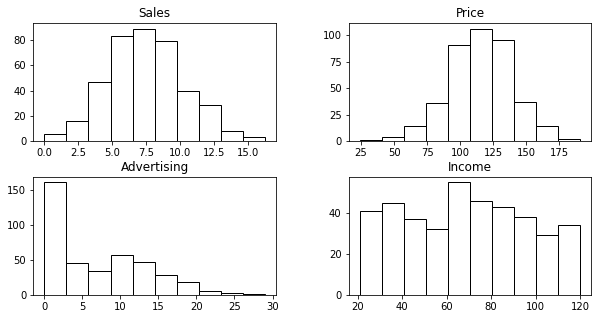

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2,
figsize =(10,5))
prodata.hist(column = "Sales", ax = axes[0,0], color = 'white', edgecolor = 'black', grid =False)
prodata.hist(column = 'Price', ax = axes[0,1],color = 'white', edgecolor = 'black', grid =False)
prodata.hist(column = 'Advertising', ax =axes[1,0], color = 'white', edgecolor = 'black',grid = False)
prodata.hist(column = 'Income', ax = axes[1,1],color = 'white', edgecolor = 'black', grid =False)
plt.show()

For each of the given variables, the following observations can be
made:
* Sales: it appears that the distribution is symmetric and leptokurtic.
* Price: the distribution seems to be again symmetric and leptokurtic.
* Advertising: a leptokurtic right-skew in the distribution.
* Income seems to be uniformly distributed.

## Q-Q Plots to observe normality/log-normality of the Sales and Price variates

C:\Users\Nikhil patel\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nikhil patel\anaconda3\lib\site-packages\numpy\lib\function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


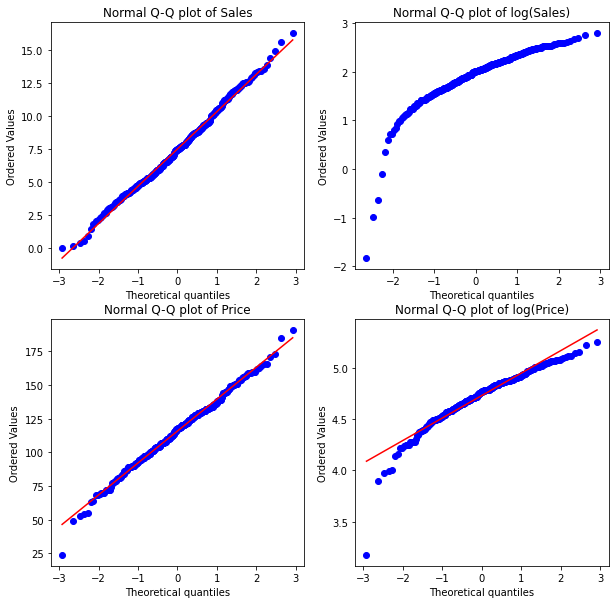

In [15]:
plt.figure(figsize=(10,10));
# Sales
plt.subplot(2,2,1);
stats.probplot(prodata['Sales'], dist="norm",plot=plt, fit = True);
plt.title('Normal Q-Q plot of Sales');

plt.subplot(2,2,2);
stats.probplot(np.log(prodata['Sales']),dist="norm", plot=plt, fit = True);
plt.title('Normal Q-Q plot of log(Sales)');
#price
plt.subplot(2,2,3)
stats.probplot(prodata['Price'], dist="norm",
plot=plt, fit = True)
plt.title('Normal Q-Q plot of Price')
plt.subplot(2,2,4)
stats.probplot(np.log(prodata['Price']),
dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of log(Price)')
plt.show()

the scatter plot of theoretical and sample quantiles fit the reference line better for normal distribution for both case.

# One sample t-test

Note: Price and Sales are normally distributed hence the assumption of
##### the t-test is satisfied.
1. The null hypothesis, H0: μ = μ0 vs.
2. Alternate hypothesis, H1: μ ≠ μ0


(i) Apply t-test for the null hypothesis that the true mean
of Sales is 7.


In [16]:
x = prodata['Sales']
np.mean(x)


7.496325

### t-test to test μ = 7 with a conf.level = 0.95

In [17]:
t,p = stats.ttest_1samp(x,7)
print('t-Statistic = %.4f, p-value = %.4f' % (t,
p))

t-Statistic = 3.5149, p-value = 0.0005


### confidence interval of sample mean

In [18]:
(ll,ul) = stats.t.interval(alpha=0.95,
df=len(x)-1, loc=np.mean(x), scale=stats.sem(x))
print("CI for Sales = (%.4f,%.4f)" % (ll,ul))

CI for Sales = (7.2187,7.7739)


***From Above We can conclude that:-***
1. The estimated population mean is 7.496 and the 95% CI is (7.219,7.774).
2. With only a 5% chance of being wrong, an assertion can be made that the true mean of Sales lies between 7.22 and 7.77
3. Since the p-value is less than 0.05, reject the null hypothesis and conclude that the true Sales mean is not equal to 7.



### Apply t-test for the null hypothesis that the true mean of Price is 115.


In [19]:
y = prodata['Price']
np.mean(y)


115.795

#### t-test to test μ= 115 with a conf.level = 0.95


In [20]:
t,p = stats.ttest_1samp(y,115)
print('t-Statistic = %.4f, p-value = %.4f' % (t,p))

t-Statistic = 0.6715, p-value = 0.5023


In [21]:
(ll,ul) = stats.t.interval(alpha=0.95,
df=len(x)-1, loc=np.mean(y), scale=stats.sem(y))
print("CI for Sales = (%.4f,%.4f)" % (ll,ul))

CI for Sales = (113.4677,118.1223)


***From Above We can conclude that:-***
1. The estimated Price mean is 115.795 and the 95% CI is (113.4677,118.1223).
2. With only a 5% chance of being wrong, an assertion can be made that the true mean of Sales lies between 113.4677 and 118.1223
3. Since the p-value is greater than 0.05, accept the null hypothesis and conclude that the true Price mean is equal to 115.

# Two sample t-tests

##### Q. Subset the dataset based on whether the store is located in the US or not

In [22]:
#storing data where US column is No
proUSno = prodata[prodata['US'] == 'No']
proUSno.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,6.823028,124.626761,65.281690,0.507042,252.823944,113.950704,53.133803,14.176056
std,2.602585,16.021089,27.778599,1.644878,152.355328,25.506869,17.339427,2.521677
min,0.000000,77.000000,22.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.080000,115.000000,39.000000,0.000000,113.750000,98.000000,38.000000,12.000000
50%,6.660000,124.000000,66.500000,0.000000,244.000000,116.500000,54.500000,14.000000
75%,8.522500,134.000000,84.000000,0.000000,398.250000,129.750000,65.750000,16.000000
max,14.900000,159.000000,120.000000,11.000000,508.000000,185.000000,80.000000,18.000000


In [23]:
#storing data where US column is Yes
proUSyes = prodata[prodata['US'] != 'No']
proUSyes.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,7.866899,125.166667,70.515504,10.007752,271.453488,116.810078,53.426357,13.748062
std,2.877131,14.971547,27.979456,5.917061,144.436459,22.593489,15.571737,2.665987
min,0.370000,85.000000,21.000000,0.000000,12.000000,55.000000,25.000000,10.000000
25%,5.762500,115.250000,45.000000,5.000000,148.250000,101.000000,41.250000,11.000000
50%,7.790000,125.000000,70.000000,10.000000,281.500000,118.000000,54.500000,14.000000
75%,9.987500,135.000000,93.000000,14.000000,397.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


According to the output obtained above, there seems to be a lot of
difference in the advertising budgets inside and outside the US

##### Q. Making side-by-side boxplots to visualize the difference between distributions of the subsetted datasets.

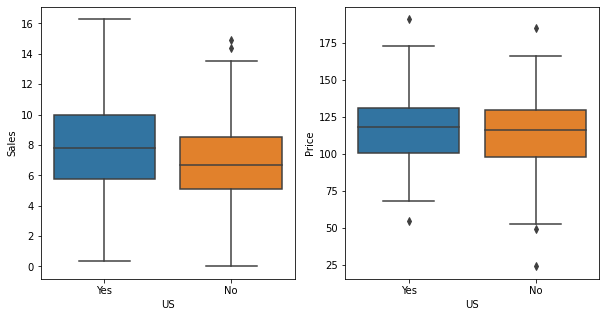

In [24]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x = prodata['US'],y =
prodata['Sales'])
plt.subplot(1,2,2)
sns.boxplot(x = prodata['US'],y =
prodata['Price'])
plt.show()

In these boxplots, you can observe that Sales are slightly higher inside
the US. However, the distribution of Price does not seem to vary much
inside and outside the US.

##### Q.Is there any difference between Price, Sales inside and outside the US?
There appears to be no difference between Prices inside and outside
the US. But to check if the difference observed in Sales is statistically
significant or not, an independent sample t-test has to be performed.


###### Q. Perform the two-sample t-test (also known as independent sample t-test) for equality of means to determine the significance of the difference in the Price, Sales inside and outside the US

In [25]:
t,p = stats.ttest_ind(proUSno['Sales'],
proUSyes['Sales'], equal_var = False)
print("t-statistic for independent t-test on Sales = %.4f and p-value = %.4f" % (t,p))


t-statistic for independent t-test on Sales = -3.6956 and p-value = 0.0003


For Sales, since the p-value is less than 0.05, reject the null hypothesis of
no difference and conclude that sales differ significantly inside and
outside the US.


In [26]:
t,p = stats.ttest_ind(proUSno['Price'],
proUSyes['Price'], equal_var = False)
print("t-statistic for independent t-test on Price = %.4f and p-value = %.4f" % (t,p))


t-statistic for independent t-test on Price = -1.1164 and p-value = 0.2653


For Price, since the p-value is greater than 0.05, do not reject the
hypothesis and conclude that prices do not differ significantly inside and
outside the US in the given sample.

## Performing analysis by subsetting using ShelveLoc

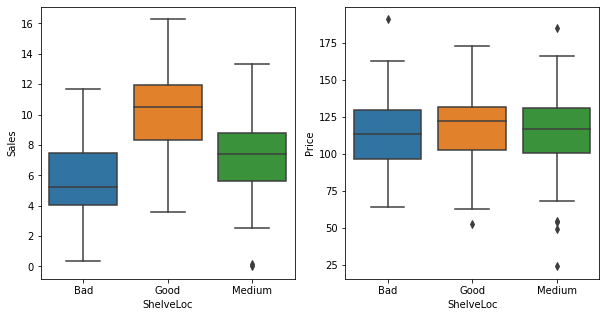

In [27]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(x = prodata['ShelveLoc'],y =
prodata['Sales'])
plt.subplot(1,2,2)
sns.boxplot(x = prodata['ShelveLoc'],y =
prodata['Price'])
plt.show()

##### Q. Do Sales seem to differ across the three levels of ShelveLoc?


Sales seem to be impacted by ShelveLoc. The median of Sales is
highest for Good followed by Medium and Bad respectively.
However, to test for the statistical significance of the difference between
means of Sales across the three levels of ShelveLoc, an F-test has to be
performed.

# F-test

##### Q. Perform an F-test to check for the homogeneity of Sales for the three levels of ShelveLoc

the f_oneway() function from the scipy.stats module can be
used to perform one-way ANOVA. It tests the null hypothesis that two or
more groups have the same population mean. The test is applied to
samples from two or more groups.


In [28]:
F,p = stats.f_oneway(
prodata['Sales'][prodata['ShelveLoc']=='Bad'],
prodata['Sales'][prodata['ShelveLoc']=='Good'],
prodata['Sales'][prodata['ShelveLoc']=='Medium']
)
print('F-Statistic = %.4f, p-value = %.4f' % (F,
p))


F-Statistic = 92.2299, p-value = 0.0000


we can see that the p-value for the F-statistic is almost zero (i.e. p-value
< 0.05). Thus, reject the null hypothesis and conclude that the mean
population Sales are not homogenous across levels of ShelveLoc.

# Correlation Analysis

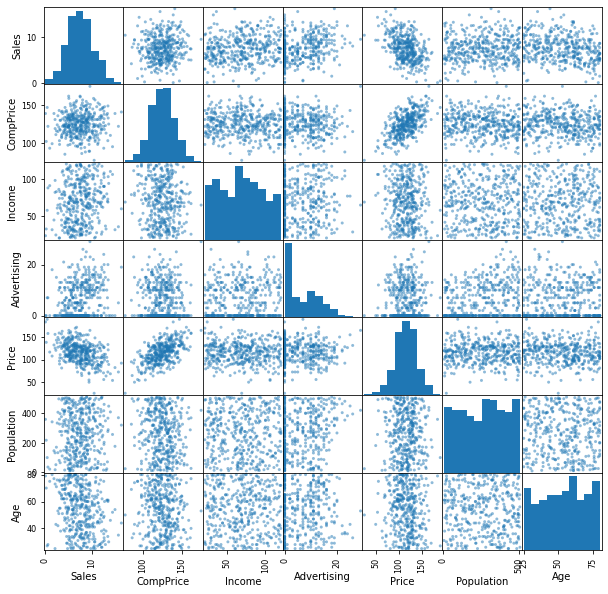

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(prodata[["Sales","CompPrice","Income","Advertising","Price","Population","Age"]],
figsize=(10,10))
plt.show()
                        

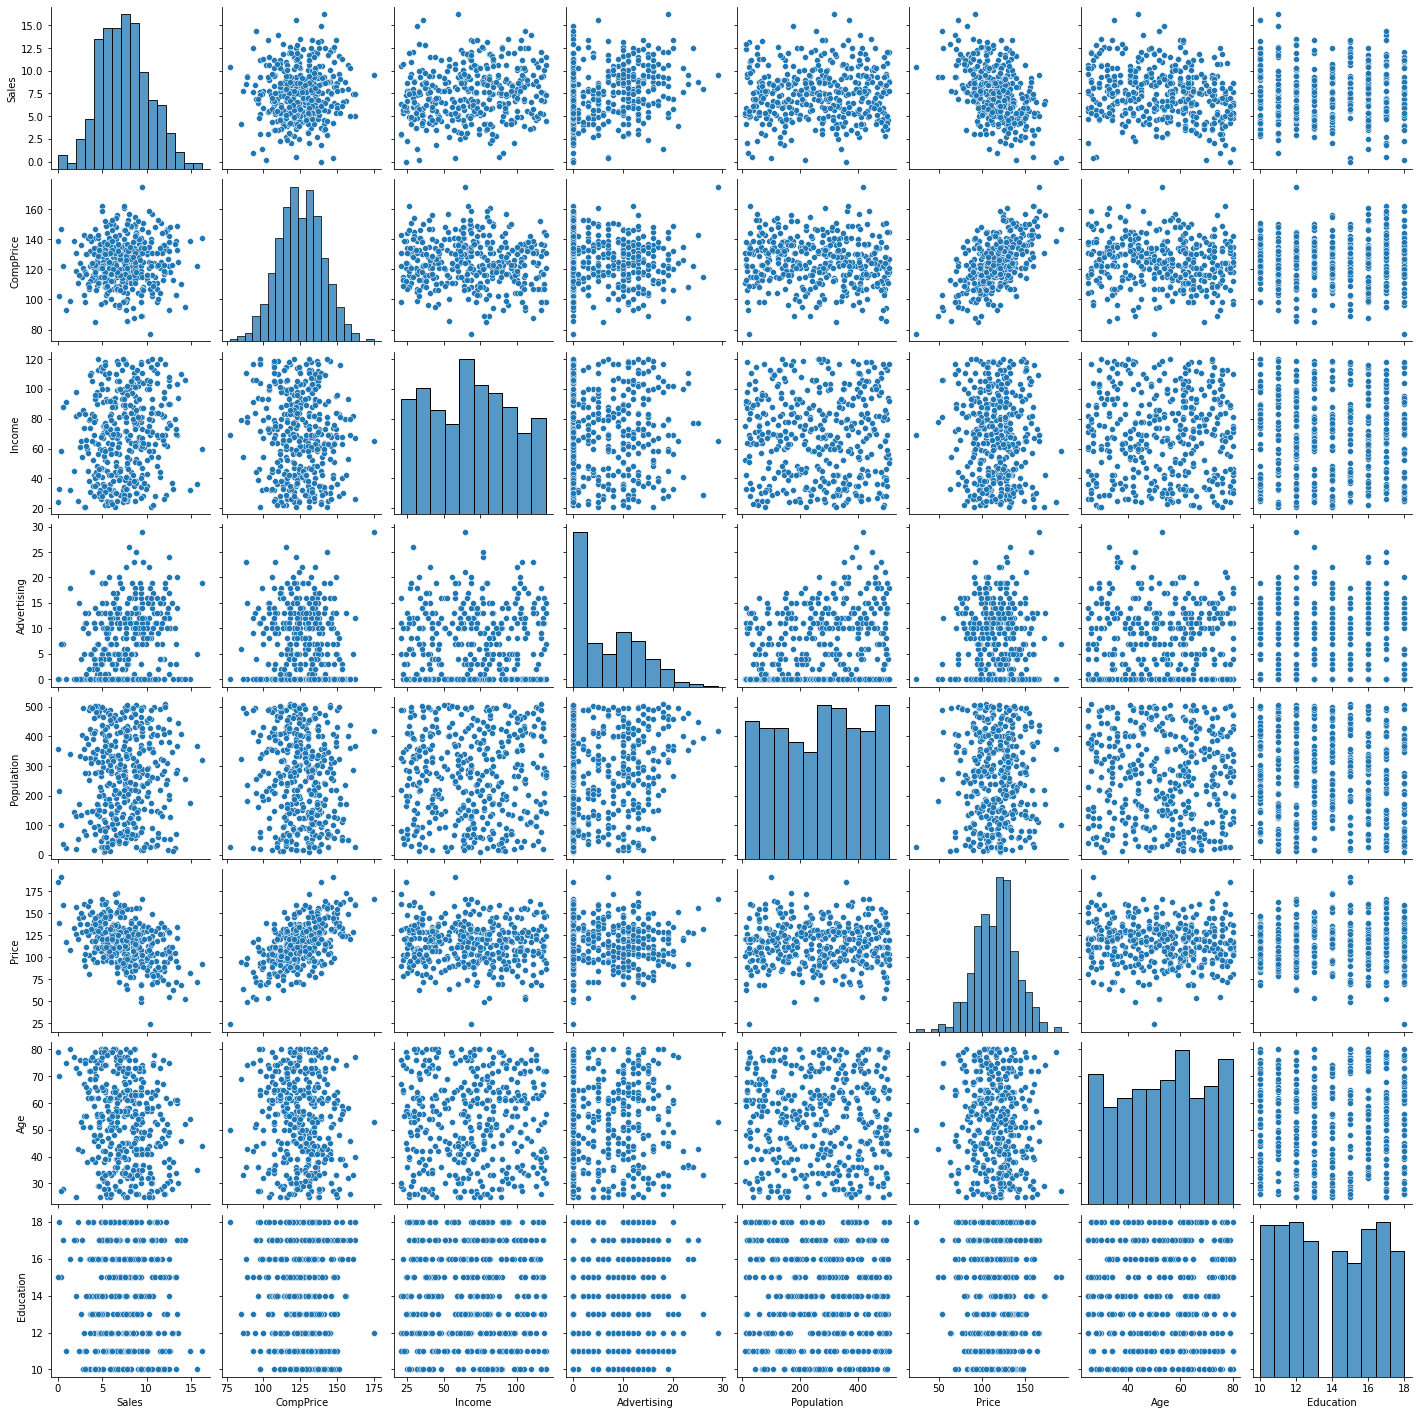

In [30]:
sns.pairplot(prodata);

In the above plot, a negative correlation between Sales and Price can be
observed. Whereas, Sales and Advertising appear to be slightly
positively correlated

#### i) Sales and Price


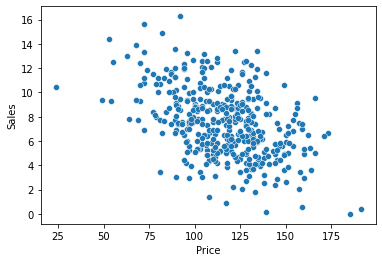

In [31]:
sns.scatterplot(y='Sales', x='Price', data =prodata)
plt.show()

A scatter plot along with a regression line can be plotted by using the
regplot() function which is defined in the seaborn library. As an
argument, you have to pass the x and y variables along with the optional
data argument.

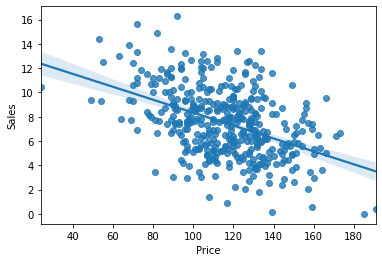

In [32]:
sns.regplot(y='Sales', x='Price', data =prodata)
plt.show()

The relationship between Price and Sales is negative. That is, at a
higher price, sales tend to be lower. The line of best fit also has a
negative slope in the above plot.

#### ii) Sales and Advertising


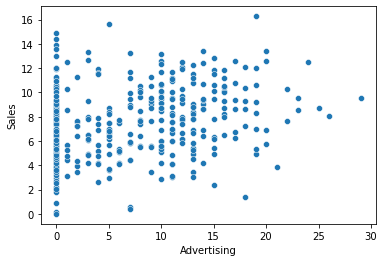

In [33]:
sns.scatterplot(y='Sales', x='Advertising', data =prodata)
plt.show()

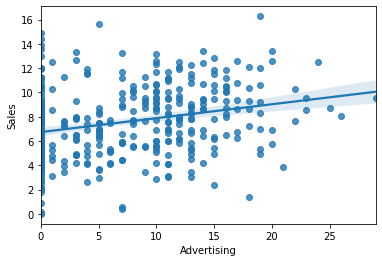

In [34]:
sns.regplot(y='Sales', x='Advertising', data =prodata)
plt.show()


There is a mildly positive association between Advertising and
Sales. The scattered points suggest that the linear relationship is not
strong.


## Perform bivariate correlation analysis for the pairs for which the visualization was done.

Null Hypothesis, H0: ρ = 0 vs. Alternate Hypothesis, H1: ρ ≠ 0
ρ = 0 means there is no any correlation, ρ ≠ 0 means there exist some correlation.


#### i) Sales and Price

In [35]:
print(prodata[['Sales','Price']].corr().round(5))

         Sales    Price
Sales  1.00000 -0.44495
Price -0.44495  1.00000


As shown above by the scatter plot between Sales and Price, the
correlation coefficient also suggests a mildly negative correlation. As a
next step, to test the significance of the population correlation
coefficient, the pearsonr() function has been applied to Sales and Price.

In [36]:
c,p = stats.pearsonr(prodata['Sales'],prodata['Price'])
print('correlation coefficient between Sales and price = %f \n p-value = %f' % (c,p))


correlation coefficient between Sales and price = -0.444951 
 p-value = 0.000000


Since p value is less than alpha so, The correlation is certainly different from zero since the p-value is
almost zero. Thus, there is a significant correlation between Sales and
Price.

#### ii) Sales and Advertising

In [37]:
c,p = stats.pearsonr(prodata['Sales'],prodata['Advertising'])
print('correlation coefficient between Sales and Advertising = %f \n p-value = %f' % (c,p))

correlation coefficient between Sales and Advertising = 0.269507 
 p-value = 0.000000


In this case, the p-value below 0.05 supports the observation about some
positive correlation between Advertising and Sales.


## BivariateLinearRegression Analysis

### OLS


In [38]:
X = prodata['Price']
Y = prodata['Sales']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           7.62e-21
Time:                        09:22:06   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.0

* Q. What is the best predictive equation for Sales given Price?
* Q. What is its interpretation?

* Sales = 13.6419 - 0.0531*Price
* For a unit increase in Price, Sales are expected to decrease by approximately 53 units.

* Q3. How much variability in Sales is explained by Price?

The adjusted R^2 of the above model is 0.196. Hence, 19.6% of the variability in Sales is explained by Price.

### Linear Regression

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

In [40]:
logmodel = LinearRegression()
logmodel.fit(X_train,Y_train)

LinearRegression()

In [41]:
prediction = logmodel.predict(X_test)

In [42]:
rmse = math.sqrt(mean_squared_error(Y_test,prediction  ))
rmse

2.460123737290208

rmse is our error. Around 0.001 is great, 1.0 - 2.0 means you should tune your model, greater than that means if tuning doesn't work, try another model.

# Regression Diagnostics

To verify the assumption of linearity between the dependent variable (y)
and independent variable (x), a scatter plot along with the fitted line is
plotted. You can also add line segments from each data point to the line
of best fit.

plot([x0
,x1],[y0
,y1]) function draws a line between pairs of points whose
coordinates are given by (x0
,y0) and (x1
,y1)

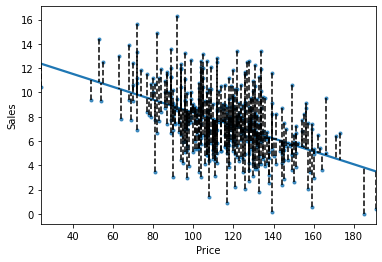

In [49]:
fig1,ax1 = plt.subplots()
sns.regplot('Price','Sales', data = prodata, ax= ax1, ci = False, marker = '.')
ax1.plot([prodata['Price'],prodata['Price']],[prodata['Sales'],model.predict()], linestyle='--',
color = 'black')
plt.show()

They should be identical, that is, they should fall on the 1:1 line. Of
course, they are not equal because of the presence of errors in model
fitting. In any case, they should be symmetric about a 1:1 line (i.e. the
length of the residual segments should be approximately equal above and
below the line) throughout the range.

### Plot Residuals vs. Predicted with 3,2,1 sigma limits (to test the presence of heteroscedasticity).

Our assumption regarding the constant variance of error terms
(homoscedasticity) may not hold in the original data.To check for this, a plot of residuals against the predicted values is made.
If the scatter is sufficiently random, that is, no pattern can be identified in
the plot then we can say that heteroscedasticity is not significant.

C:\Users\Nikhil patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


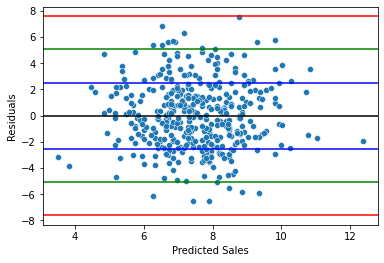

In [53]:
Y_pred = model.predict(X)
residuals = Y - Y_pred
sd_red=np.std(residuals)
a=[-3,-2,-1,0,1,2,3]
b=['r','g','b','k','b','g','r']
sns.scatterplot(Y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
for i,j in zip(a,b):plt.axhline(i*sd_red,color=j)

All the residuals should ideally fall on the horizontal line with a
y-intercept as 0. However, they don’t fall on that line due to the presence
of error. But in any case, they should be symmetric about this line
throughout the range and have the same degree of spread.
There is no visible pattern in the plot and the spread seems to be random.
This confirms that there is no heteroscedasticity in the data.
